# Theory
The state prepared on the 0th qubit:
$$
\newcommand{\ket}[1]{\left|#1\right\rangle}
\ket{\psi_0}=\cos\frac{\theta}{2}\ket{0}+\sin\frac{\theta}{2}\ket{1}
$$

What will be measured:
$$
\newcommand{\braket}[2]{\left\langle #1\ | \ #2\right\rangle}
\alpha=\left|\braket{0}{\psi_0}\right|^2=\cos^2\frac{\theta}{2}\\
\beta=\left|\braket{1}{\psi_0}\right|^2=\sin^2\frac{\theta}{2}
$$


The state prepared on all 3 qubits:
\begin{align}
\newcommand{\ket}[1]{\left|#1\right\rangle}
\ket{\psi}=\left(\cos\frac{\theta}{2}\ket{0}+\sin\frac{\theta}{2}\ket{1}\right)\otimes\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})=\\
=\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{00}+\ket{11})\otimes\left(\cos\frac{\theta}{2}\ket{0}+\sin\frac{\theta}{2}\ket{1}\right)\\
+\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{00}-\ket{11})\otimes\left(\cos\frac{\theta}{2}\ket{0}-\sin\frac{\theta}{2}\ket{1}\right)\\
+\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{01}+\ket{10})\otimes\left(\sin\frac{\theta}{2}\ket{0}+\cos\frac{\theta}{2}\ket{1}\right)\\
+\frac{1}{2}\frac{1}{\sqrt{2}}(\ket{01}-\ket{10})\otimes\left(\sin\frac{\theta}{2}\ket{0}-\cos\frac{\theta}{2}\ket{1}\right)
\end{align}

Therefore:
$$
\newcommand{\braket}[2]{\left\langle #1\ | \ #2\right\rangle}
\alpha=\left|\braket{000}{\psi}\right|^2+\left|\braket{110}{\psi}\right|^2+\left|\braket{011}{\psi}\right|^2+\left|\braket{101}{\psi}\right|^2\\
\beta=\left|\braket{001}{\psi}\right|^2+\left|\braket{111}{\psi}\right|^2+\left|\braket{010}{\psi}\right|^2+\left|\braket{100}{\psi}\right|^2
$$


# Extracting data

In [1]:
import sys
sys.path.append('../jobDataGatherer')
sys.path.append('../')
from check_QE import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
jobs=get_done_jobs(200)
jobs=[j for j in jobs if j['creationDate']>'2018-07-10T1']
len(jobs)

167

In [25]:
from collections import Counter
Counter([j['backend']['name'] for j in jobs])

Counter({'ibmqx4': 91, 'ibmqx5': 76})

In [3]:
data=filter_jobs_data(jobs)

In [4]:
data=pd.DataFrame.from_dict(data)

Every job consists of 20 circuits: 1 test circuit and 1 teleportation circuit for 10 different degrees $\theta \in [0;\pi]$

In [5]:
data['theta']=np.tile(np.repeat(np.linspace(0,np.pi,10),2),int(data.shape[0]/20))
data['job']=np.tile(['test','teleport'],int(data.shape[0]/2))
data['index']=np.repeat(range(int(data.shape[0]/20)),20)
data.head()

,backend_name,date,results,theta,job,index
0,ibmqx4,2018-07-11T11:07:03.100Z,"{'00000': 997, '00001': 10, '00010': 7, '00100...",0.000000,test,0
1,ibmqx4,2018-07-11T11:07:03.118Z,"{'00000': 467, '00001': 2, '00010': 25, '00100...",0.000000,teleport,0
2,ibmqx4,2018-07-11T11:07:03.253Z,"{'00000': 966, '00001': 39, '00010': 13, '0001...",0.349066,test,0
3,ibmqx4,2018-07-11T11:07:03.404Z,"{'00000': 441, '00001': 15, '00010': 28, '0001...",0.349066,teleport,0
4,ibmqx4,2018-07-11T11:07:03.435Z,"{'00000': 930, '00001': 69, '00010': 6, '00100...",0.698132,test,0


Extracting counts from dictionaries:

In [6]:
results=data.results.apply(pd.Series)
results=results.fillna(0)
results.head()

,00000,0000000000000000,0000000000000001,0000000000000010,0000000000000011,0000000000000100,0000000000000101,0000000000000110,0000000000000111,00001,...,00110,00111,1000000000000000,1000000000000001,1000000000000010,1000000000000011,1000000000000100,1000000000000101,1000000000000110,1000000000000111
0,997.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,467.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,457.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,966.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,441.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,466.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Diagnostic plots to guess which qubit is which:

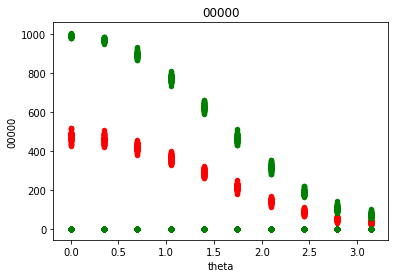

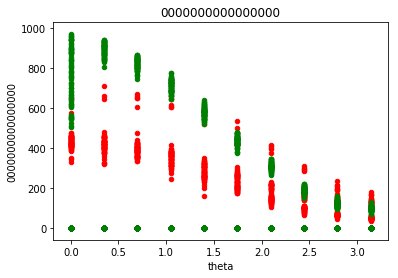

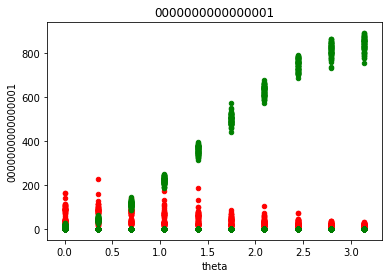

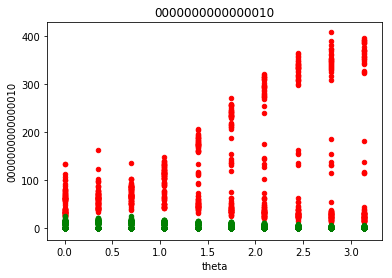

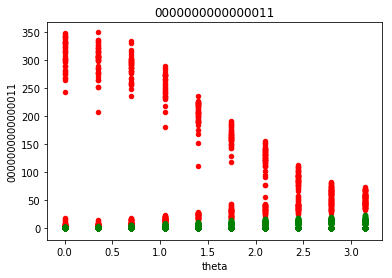

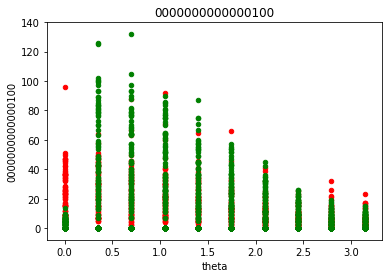

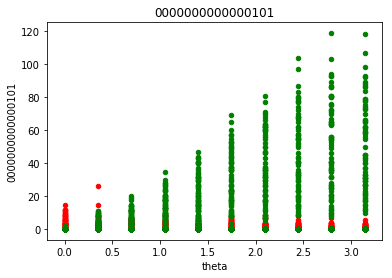

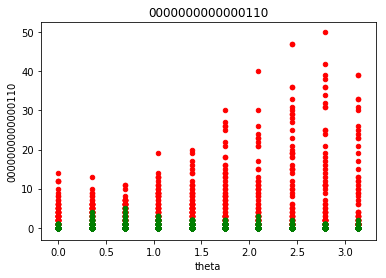

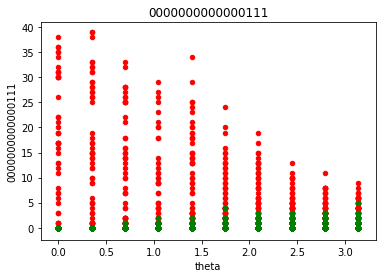

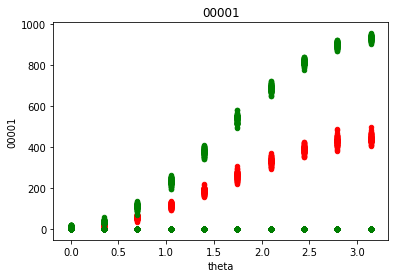

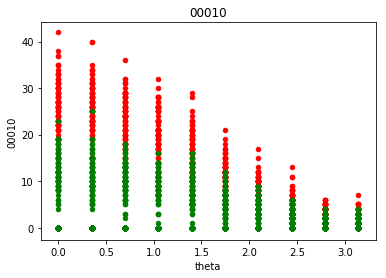

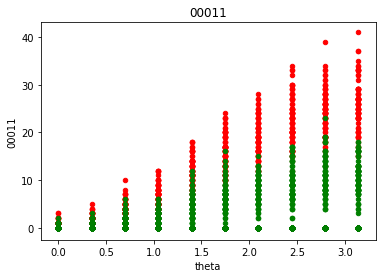

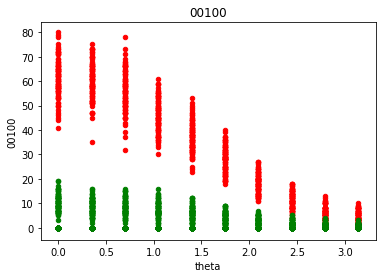

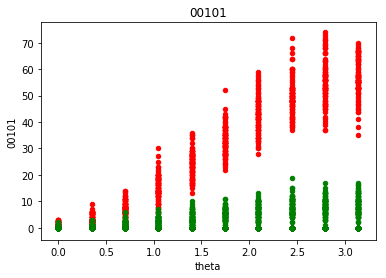

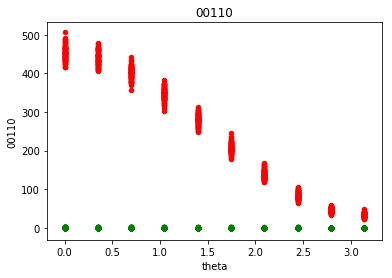

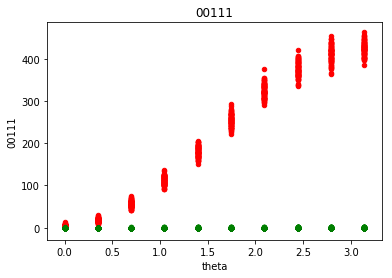

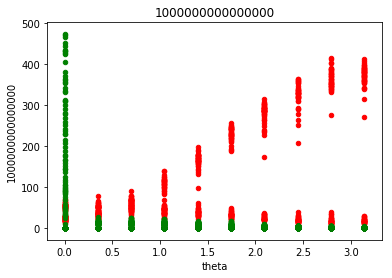

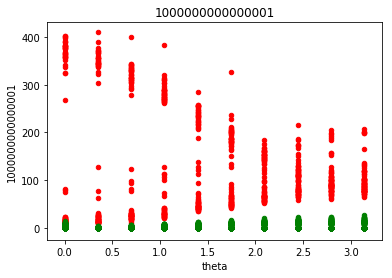

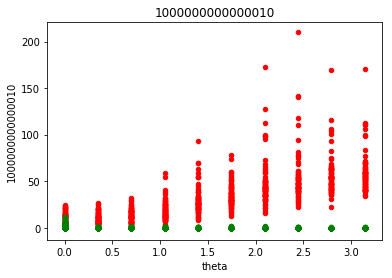

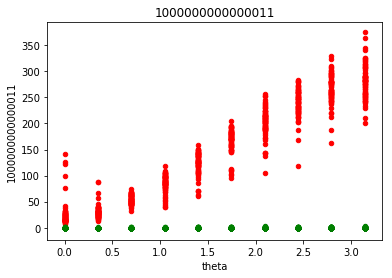

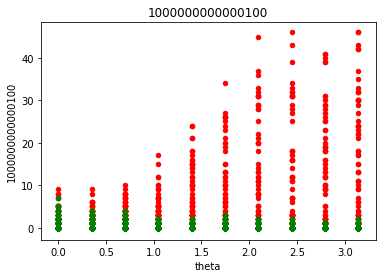

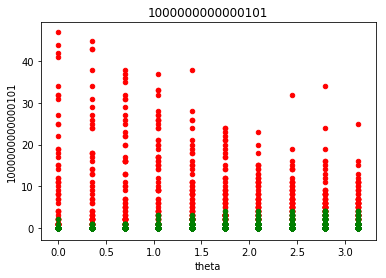

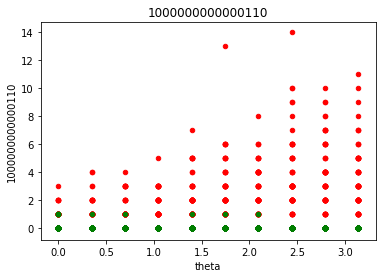

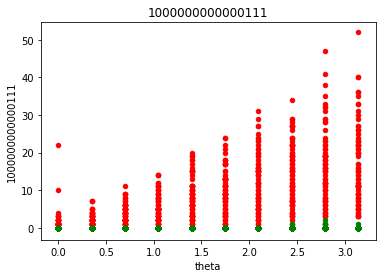

In [7]:
keys=list(results)
results['theta']=np.tile(np.repeat(np.linspace(0,np.pi,10),2),int(data.shape[0]/20))
results['job']=np.tile(['test','teleport'],int(data.shape[0]/2))
color={'test':'green','teleport':'red'}
for key in keys:
    f,a=plt.subplots()
    for k,group in results.groupby('job'):
        group.plot.scatter(x='theta',y=key,c=color[k],title=key,ax=a)
    plt.show()

Guess:

ibmqx5: t000000000000xyz

z=q[0]

y=q[1]

t=q[2]

x=error

ibmqx4: 00abc

c=q[0]

b=q[1]

a=q[2]

Adding counts to data frame, column name = $q_0*q_1*q_2$, where $q_i \in \{0,1\}$ is the state measured on $i$-th qubit:

In [8]:
data['X000']=results['0000000000000000']+results['0000000000000100']+results['00000']
data['X001']=results['1000000000000000']+results['1000000000000100']+results['00100']
data['X010']=results['0000000000000010']+results['0000000000000110']+results['00010']
data['X011']=results['1000000000000010']+results['1000000000000110']+results['00110']
data['X100']=results['0000000000000001']+results['0000000000000101']+results['00001']
data['X101']=results['1000000000000001']+results['1000000000000101']+results['00101']
data['X110']=results['0000000000000011']+results['0000000000000111']+results['00011']
data['X111']=results['1000000000000011']+results['1000000000000111']+results['00111']

Extracting measured $\alpha$ and $\beta$:

In [9]:
test_data=data.query('job=="test"')
teleport_data=data.query('job=="teleport"')
test_data['alpha']=test_data.X000+test_data.X001+test_data.X010+test_data.X011
test_data['beta']=test_data.X100+test_data.X101+test_data.X110+test_data.X111
teleport_data['alpha']=teleport_data.X000+teleport_data.X110+teleport_data.X011+teleport_data.X101
teleport_data['beta']=teleport_data.X001+teleport_data.X111+teleport_data.X100+teleport_data.X010

C:\Users\Alicja\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alicja\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Alicja\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Aggregating data:

In [10]:
agg_data=teleport_data[['backend_name','date','theta','index','alpha','beta']]
agg_data=agg_data.rename(columns={'backend_name':'backend'})
agg_data['alpha']=agg_data['alpha']/1024
agg_data['beta']=agg_data['beta']/1024
agg_data=agg_data.assign(
    alpha_test=list(test_data.alpha/1024),
    beta_test=list(test_data.beta/1024),
    alpha_theory=np.cos(agg_data.theta/2)**2,
    beta_theory=np.sin(agg_data.theta/2)**2
)
agg_data.head()

,backend,date,theta,index,alpha,beta,alpha_test,beta_test,alpha_theory,beta_theory
1,ibmqx4,2018-07-11T11:07:03.118Z,0.000000,0,0.902344,0.097656,0.989258,0.010742,1.000000,0.000000
3,ibmqx4,2018-07-11T11:07:03.404Z,0.349066,0,0.889648,0.110352,0.960938,0.039062,0.969846,0.030154
5,ibmqx4,2018-07-11T11:07:03.538Z,0.698132,0,0.788086,0.211914,0.926758,0.073242,0.883022,0.116978
7,ibmqx4,2018-07-11T11:07:03.745Z,1.047198,0,0.726562,0.273438,0.764648,0.235352,0.750000,0.250000
9,ibmqx4,2018-07-11T11:07:04.255Z,1.396263,0,0.599609,0.400391,0.607422,0.392578,0.586824,0.413176


Creating data frames with data in long format, for easy plotting with ggplot:

In [11]:
long_data=pd.melt(agg_data,
                 id_vars=['backend','theta','index','date'])
long_data['job']=long_data['variable'].map({
    'alpha':'teleport',
    'beta':'teleport',
    'alpha_theory':'theory',
    'beta_theory':'theory',
    'alpha_test':'test',
    'beta_test':'test'
})
long_data['obs']=long_data['variable'].map({
    'alpha':'alpha',
    'beta':'beta',
    'alpha_theory':'alpha',
    'beta_theory':'beta',
    'alpha_test':'alpha',
    'beta_test':'beta',
})
long_data=long_data.drop('variable',1)
long_data.head()

,backend,theta,index,date,value,job,obs
0,ibmqx4,0.000000,0,2018-07-11T11:07:03.118Z,0.902344,teleport,alpha
1,ibmqx4,0.349066,0,2018-07-11T11:07:03.404Z,0.889648,teleport,alpha
2,ibmqx4,0.698132,0,2018-07-11T11:07:03.538Z,0.788086,teleport,alpha
3,ibmqx4,1.047198,0,2018-07-11T11:07:03.745Z,0.726562,teleport,alpha
4,ibmqx4,1.396263,0,2018-07-11T11:07:04.255Z,0.599609,teleport,alpha


In [12]:
obs_data=pd.pivot_table(long_data,index=['index','backend','theta','obs','date'],columns='job',values=['value'])
obs_data.columns=[x[1] for x in list(obs_data)]
obs_data=obs_data.reset_index()

obs_data.head()

,index,backend,theta,obs,date,teleport,test,theory
0,0,ibmqx4,0.000000,alpha,2018-07-11T11:07:03.118Z,0.902344,0.989258,1.000000
1,0,ibmqx4,0.000000,beta,2018-07-11T11:07:03.118Z,0.097656,0.010742,0.000000
2,0,ibmqx4,0.349066,alpha,2018-07-11T11:07:03.404Z,0.889648,0.960938,0.969846
3,0,ibmqx4,0.349066,beta,2018-07-11T11:07:03.404Z,0.110352,0.039062,0.030154
4,0,ibmqx4,0.698132,alpha,2018-07-11T11:07:03.538Z,0.788086,0.926758,0.883022


In [13]:
theory_data=pd.DataFrame({
    'theta':np.linspace(0,np.pi,50),
    'backend':'theory','index':-1,'variable':'alpha',
    'value':np.cos(np.linspace(0,np.pi,50)/2)**2}).append(
    pd.DataFrame({
    'theta':np.linspace(0,np.pi,50),
    'backend':'theory','index':-1,'variable':'beta',
    'value':np.sin(np.linspace(0,np.pi,50)/2)**2}))


# Visualization
Every line represents one job.

In [14]:
from ggplot import *
#from ggplot.stats.stat_function import stat_function
#from rpy2.rinterface import parse

C:\Users\Alicja\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Alicja\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


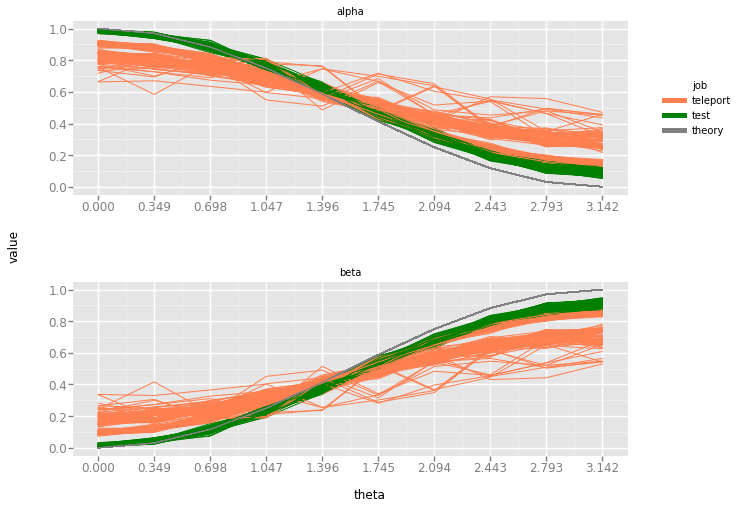

<ggplot: (-9223371892384485411)>

In [15]:
ggplot(aes(x='theta',y='value',group='index',colour='job'),data=long_data)+\
    geom_line()+\
    scale_x_continuous(breaks=list(np.linspace(0,np.pi,10)),name='theta')+ \
    scale_color_manual(values=['coral','green','gray'])+\
    facet_wrap("obs")

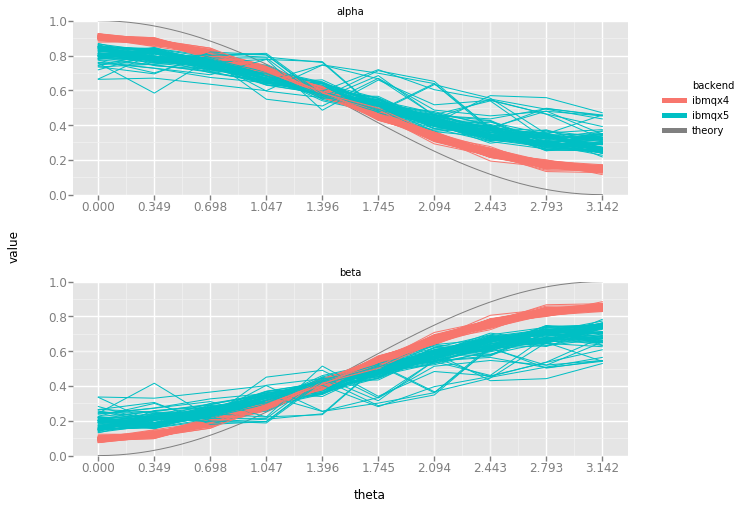

<ggplot: (144471862241)>

In [16]:
ggplot(aes(x='theta',y='value',group='index',colour='backend'),
       data=pd.melt(agg_data,id_vars=['backend','theta','index'],value_vars=['alpha','beta']).append(theory_data))+\
    geom_line()+\
    scale_x_continuous(breaks=list(np.linspace(0,np.pi,10)))+ylim(0,1)+ \
    scale_color_manual(values=['#F8766D','#00BFC4','gray'])+\
    facet_wrap("variable")

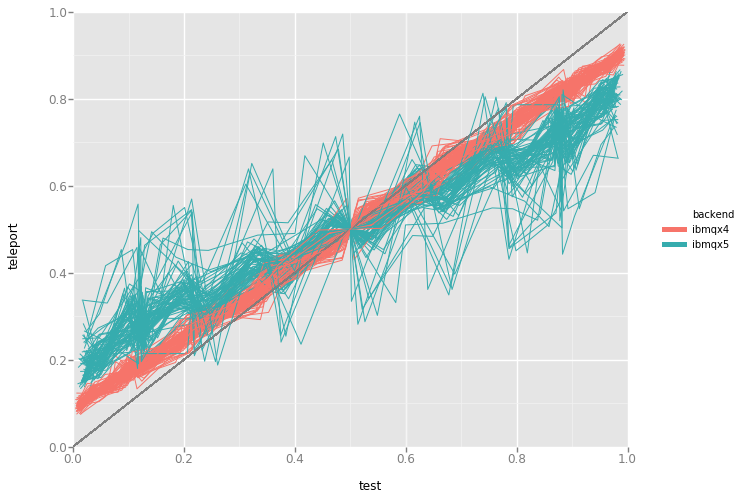

<ggplot: (144464409878)>

In [17]:
ggplot(aes(x='test',y='teleport',group='index',colour='backend'),data=obs_data)+\
geom_abline(1,0,color='gray')+geom_line()+\
xlim(0,1)+ylim(0,1)

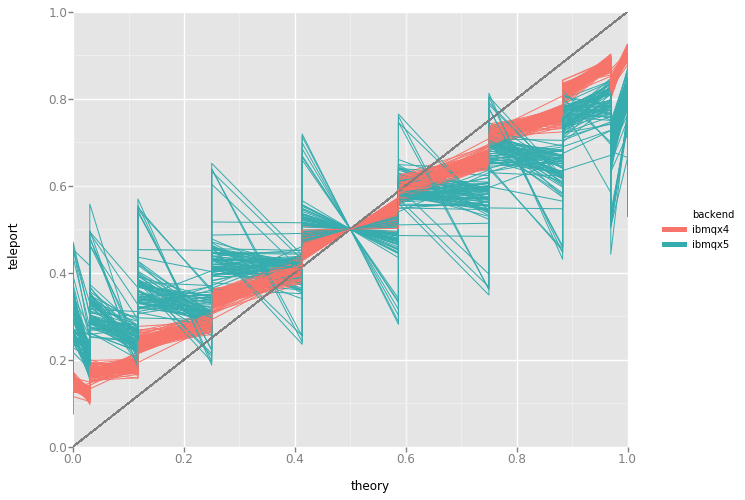

<ggplot: (-9223371892382694049)>

In [18]:
ggplot(aes(x='theory',y='teleport',group='index',colour='backend'),data=obs_data)+\
geom_abline(1,0,color='gray')+\
geom_line()+\
xlim(0,1)+ylim(0,1)

## Errors analysis

$ERROR=(\alpha-\cos^2\frac{\theta}{2})^2+(\beta-\sin^2\frac{\theta}{2})$

$ERROR_{test}$ for $\alpha$,$\beta$ measured on test circuits, $ERROR_{teleport}$ for $\alpha$,$\beta$ measured on teleportation circuits.

In [19]:
error_data=obs_data
error_data['error_test']=(error_data['test']-error_data['theory'])**2
error_data['error_teleport']=(error_data['teleport']-error_data['theory'])**2
error_data=error_data.groupby(['index','backend','theta','date']).agg({'error_test':'sum','error_teleport':'sum'})
error_data=error_data.reset_index()
error_data.head()

,index,backend,theta,date,error_test,error_teleport
0,0,ibmqx4,0.000000,2018-07-11T11:07:03.118Z,0.000231,0.019073
1,0,ibmqx4,0.349066,2018-07-11T11:07:03.404Z,0.000159,0.012863
2,0,ibmqx4,0.698132,2018-07-11T11:07:03.538Z,0.003826,0.018026
3,0,ibmqx4,1.047198,2018-07-11T11:07:03.745Z,0.000429,0.001099
4,0,ibmqx4,1.396263,2018-07-11T11:07:04.255Z,0.000849,0.000327


In [20]:
jobs_error=error_data.groupby(['index','backend']).agg({'error_test':'sum','error_teleport':'sum'}).reset_index()
jobs_error['error']=jobs_error['error_test']+jobs_error['error_teleport']
jobs_error.head()

,index,backend,error_test,error_teleport,error
0,0,ibmqx4,0.076042,0.191418,0.267460
1,1,ibmqx4,0.075866,0.156556,0.232422
2,2,ibmqx4,0.049043,0.195049,0.244092
3,3,ibmqx4,0.059527,0.171483,0.231010
4,4,ibmqx4,0.052705,0.186399,0.239103


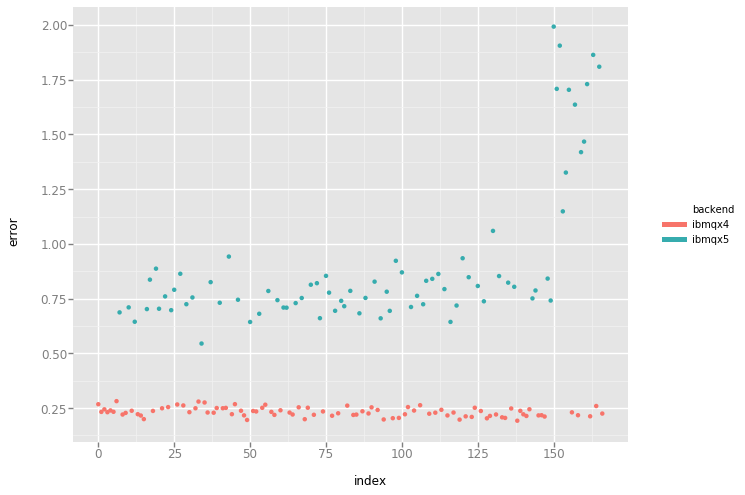

<ggplot: (-9223371892380226812)>

In [24]:
ggplot(aes(x='index',y='error',color='backend'),data=jobs_error)+geom_point()#+scale_x_datetime()

Observation: Error increases with $\theta$ - as we already know, state 0 is prefered, and the greater $\theta$, the greater $|\langle1|\psi\rangle|$

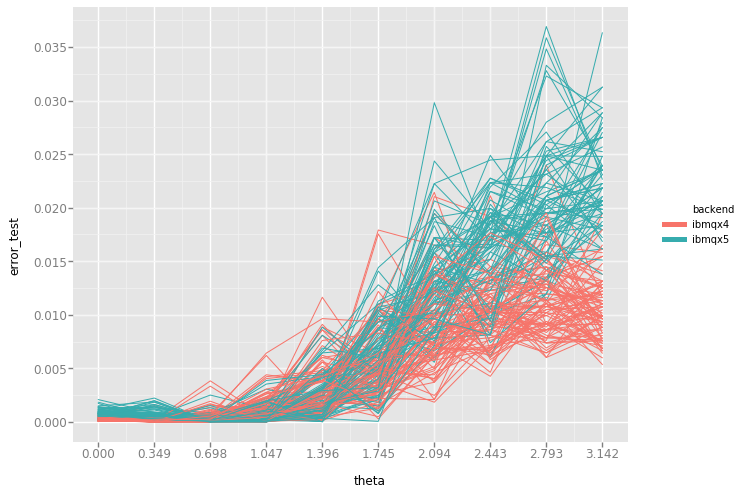

<ggplot: (-9223371892384485495)>

In [21]:
ggplot(aes(x='theta',y='error_test',group='index',colour='backend'),data=error_data)+\
geom_line()+ \
scale_x_continuous(breaks=list(np.linspace(0,np.pi,10)))

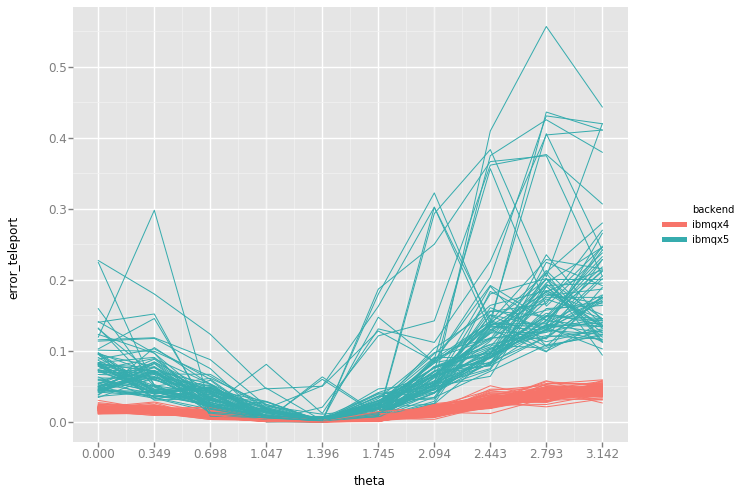

<ggplot: (-9223371892382553358)>

In [22]:
ggplot(aes(x='theta',y='error_teleport',group='index',colour='backend'),data=error_data)+\
geom_line()+ \
scale_x_continuous(breaks=list(np.linspace(0,np.pi,10)))

Are errors on test and teleportation circuits correlated?

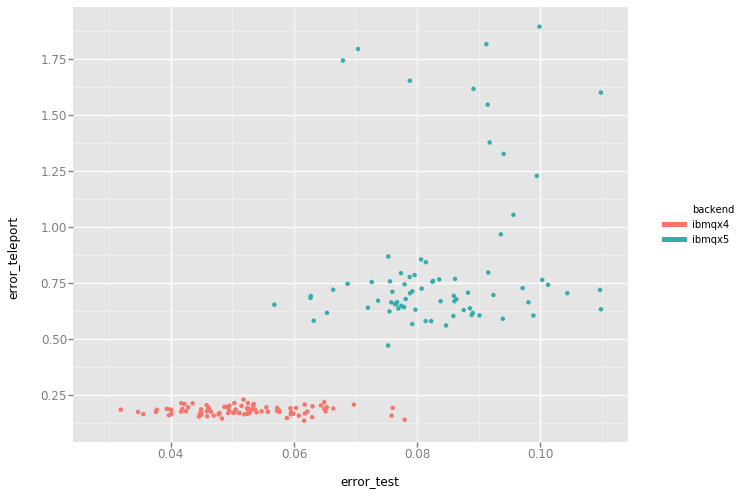

<ggplot: (-9223371892384485516)>

In [23]:
ggplot(aes(x='error_test',y='error_teleport',colour='backend'),
       data=jobs_error)+\
geom_point()